In [4]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
file_path = "nyc-property-sales.csv" 
data = pd.read_csv(file_path)

# Columns to convert to numeric
numeric_columns = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 'SALE PRICE']
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Drop rows with missing SALE PRICE
data = data.dropna(subset=['SALE PRICE'])

# Impute missing values for numerical columns
impute_columns = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT']
for col in impute_columns:
    data[col] = data[col].fillna(data[col].median())

# Ensure categorical columns are strings
categorical_columns = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT']
for col in categorical_columns:
    data[col] = data[col].astype(str)

# Drop irrelevant columns
irrelevant_columns = ['APARTMENT NUMBER']
data = data.drop(columns=irrelevant_columns, errors='ignore')

# Define demand levels (high demand: top 25%, low demand: below top 25%)
threshold = data['SALE PRICE'].quantile(0.75)
data['DEMAND_LEVEL'] = np.where(data['SALE PRICE'] > threshold, 1, 0)

# Define features (X) and target (y)
columns_to_exclude = ['SALE PRICE', 'EASE-MENT', 'ADDRESS', 'SALE DATE', 'DEMAND_LEVEL']
X = data.drop(columns=columns_to_exclude, errors='ignore')
y = data['DEMAND_LEVEL']

# Ensure categorical features are strings and handle missing values
for col in categorical_columns:
    X[col] = X[col].fillna('Unknown')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),  # Impute missing values
            ('scaler', StandardScaler())  # Scale numerical features
        ]), impute_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)  # One-hot encode categorical features
    ]
)

# Logistic Regression Model Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('logreg', LogisticRegression(random_state=42, max_iter=1000))  # Logistic Regression model
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


/var/folders/qz/nf75cr_j2szgdjxl_hbblnx00000gn/T/ipykernel_71687/381051096.py:14: DtypeWarning: Columns (0,4,5,6,10,11,12,13,14,15,16,17,19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86    302966
           1       0.60      0.37      0.46    100644

    accuracy                           0.78    403610
   macro avg       0.71      0.64      0.66    403610
weighted avg       0.76      0.78      0.76    403610

Confusion Matrix:
[[278203  24763]
 [ 63638  37006]]


/var/folders/qz/nf75cr_j2szgdjxl_hbblnx00000gn/T/ipykernel_71687/3999434623.py:8: DtypeWarning: Columns (0,4,5,6,10,11,12,13,14,15,16,17,19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


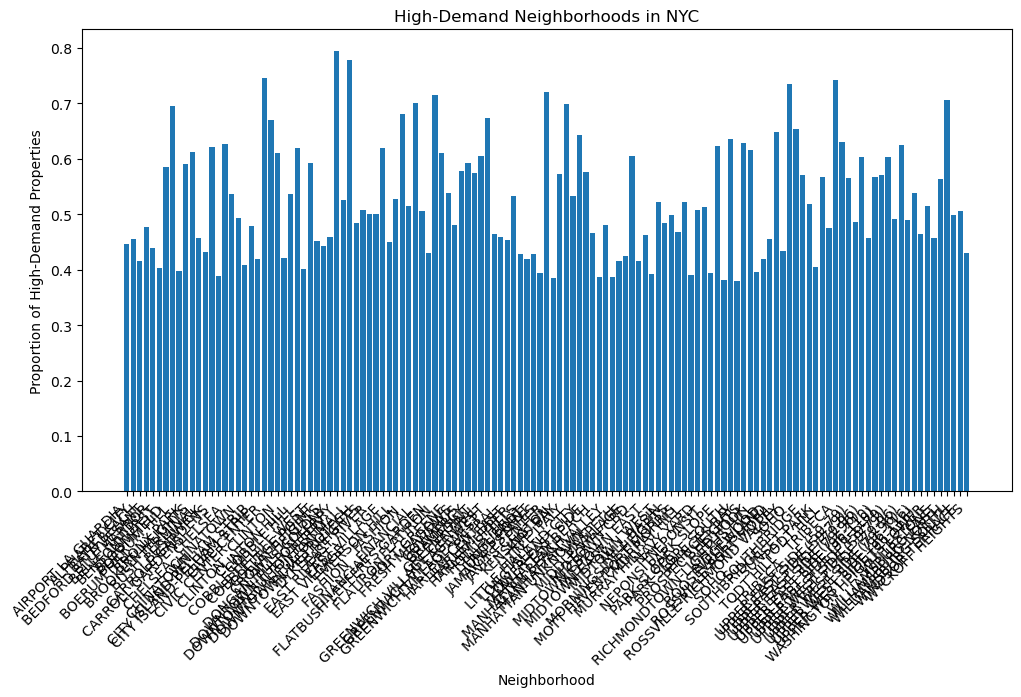

                  NEIGHBORHOOD  AVG_SALE_PRICE  MEDIAN_SALE_PRICE  \
0                         1021    0.000000e+00                0.0   
1                         1026    0.000000e+00                0.0   
2                         3004    3.407040e+05           340704.0   
3                         3019    0.000000e+00                0.0   
4                  AIRPORT JFK    1.373667e+06                0.0   
..                         ...             ...                ...   
511  WOODROW                      3.573657e+05           370900.0   
512                   WOODSIDE    6.912908e+05           333000.0   
513  WOODSIDE                     3.566439e+05           190000.0   
514            WYCKOFF HEIGHTS    8.632250e+05           590000.0   
515  WYCKOFF HEIGHTS              4.331540e+05           250000.0   

     TOTAL_SALES  HIGH_DEMAND_COUNT  HIGH_DEMAND_RATIO DEMAND_CLASS  
0              1                  0           0.000000   Low Demand  
1             23               

In [5]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = "nyc-property-sales.csv"
data = pd.read_csv(file_path)

# Data cleaning
# Convert columns to numeric
numeric_columns = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 'SALE PRICE']
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Drop rows with missing SALE PRICE
data = data.dropna(subset=['SALE PRICE'])

# Impute missing values
impute_columns = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT']
for col in impute_columns:
    data[col] = data[col].fillna(data[col].median())

# Ensure categorical columns are strings
categorical_columns = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT']
for col in categorical_columns:
    data[col] = data[col].astype(str)

# Define demand levels (high demand: top 25%, low demand: below top 25%)
threshold = data['SALE PRICE'].quantile(0.75)
data['DEMAND_LEVEL'] = np.where(data['SALE PRICE'] > threshold, 1, 0)

# Aggregate data by neighborhood
neighborhood_stats = data.groupby('NEIGHBORHOOD').agg({
    'SALE PRICE': ['mean', 'median', 'count'],  # Average, median price, and count
    'DEMAND_LEVEL': 'sum'  # Count of high-demand properties
}).reset_index()

# Rename columns for clarity
neighborhood_stats.columns = ['NEIGHBORHOOD', 'AVG_SALE_PRICE', 'MEDIAN_SALE_PRICE', 'TOTAL_SALES', 'HIGH_DEMAND_COUNT']

# Calculate the proportion of high-demand properties
neighborhood_stats['HIGH_DEMAND_RATIO'] = neighborhood_stats['HIGH_DEMAND_COUNT'] / neighborhood_stats['TOTAL_SALES']

# Define thresholds for high-demand classification
high_demand_threshold = neighborhood_stats['HIGH_DEMAND_RATIO'].quantile(0.75)

# Classify neighborhoods
neighborhood_stats['DEMAND_CLASS'] = np.where(
    neighborhood_stats['HIGH_DEMAND_RATIO'] >= high_demand_threshold, 'High Demand', 'Low Demand'
)

# Visualization: Bar chart of high-demand neighborhoods
high_demand_neighborhoods = neighborhood_stats[neighborhood_stats['DEMAND_CLASS'] == 'High Demand']

plt.figure(figsize=(12, 6))
plt.bar(high_demand_neighborhoods['NEIGHBORHOOD'], high_demand_neighborhoods['HIGH_DEMAND_RATIO'])
plt.title('High-Demand Neighborhoods in NYC')
plt.xlabel('Neighborhood')
plt.ylabel('Proportion of High-Demand Properties')
plt.xticks(rotation=45, ha='right')
plt.show()

# Print neighborhood stats
print(neighborhood_stats)


In [7]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
file_path = "nyc-property-sales.csv"
data = pd.read_csv(file_path)

# Data cleaning
# Convert columns to numeric
numeric_columns = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 'SALE PRICE']
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Drop rows with missing SALE PRICE
data = data.dropna(subset=['SALE PRICE'])

# Impute missing values
impute_columns = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT']
for col in impute_columns:
    data[col] = data[col].fillna(data[col].median())

# Ensure categorical columns are strings
categorical_columns = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT']
for col in categorical_columns:
    data[col] = data[col].astype(str)

# Define demand levels (high demand: top 25%, low demand: below top 25%)
threshold = data['SALE PRICE'].quantile(0.75)
data['DEMAND_LEVEL'] = np.where(data['SALE PRICE'] > threshold, 1, 0)

# Define features (X) and target (y)
categorical_features = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 
                        'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT']
numerical_features = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 
                      'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'SALE PRICE']
X = data[categorical_features + numerical_features]
y = data['DEMAND_LEVEL']

from sklearn.impute import SimpleImputer

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        # Impute missing numerical values with the median
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),  # Fill NaNs in numerical columns
            ('scaler', StandardScaler())  # Scale numerical features
        ]), numerical_features),

        # Impute missing categorical values with 'Unknown' and apply one-hot encoding
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),  # Fill NaNs in categorical columns
            ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
        ]), categorical_features)
    ]
)


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'))  # Logistic Regression
])

# Fit the model
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature importance
feature_names = (
    numerical_features + 
    list(pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features))
)
coefficients = pipeline.named_steps['classifier'].coef_[0]

importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients}).sort_values(by='Coefficient', ascending=False)
print("Feature Importance:")
print(importance)


/var/folders/qz/nf75cr_j2szgdjxl_hbblnx00000gn/T/ipykernel_71687/2068955671.py:13: DtypeWarning: Columns (0,4,5,6,10,11,12,13,14,15,16,17,19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    302966
           1       0.95      1.00      0.97    100644

    accuracy                           0.99    403610
   macro avg       0.98      0.99      0.98    403610
weighted avg       0.99      0.99      0.99    403610

Confusion Matrix:
[[297784   5182]
 [    78 100566]]
Feature Importance:
                                               Feature  Coefficient
6                                           SALE PRICE   239.093657
659            BUILDING CLASS CATEGORY_45 CONDO HOTELS     2.677203
563  BUILDING CLASS CATEGORY_11 SPECIAL CONDO BILLI...     2.600615
61                            NEIGHBORHOOD_BOERUM HILL     1.679340
843                       BUILDING CLASS AT PRESENT_RR     1.644485
..                                                 ...          ...
664  BUILDING CLASS CATEGORY_47  CONDO NON-BUSINESS...    -2.073575
750                       BUILDIN

In [19]:
# Get feature names
numerical_features_list = numerical_features
categorical_features_list = list(
    pipeline.named_steps['preprocessor']
    .named_transformers_['cat']
    .named_steps['onehot']
    .get_feature_names_out(categorical_features)
)

# Combine numerical and categorical feature names
feature_names = numerical_features_list + categorical_features_list

# Get coefficients from the logistic regression model
coefficients = pipeline.named_steps['classifier'].coef_[0]

# Create a DataFrame for feature importance
import pandas as pd
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Display top features
print(feature_importance)


                                               Feature  Coefficient
6                                           SALE PRICE   239.093657
659            BUILDING CLASS CATEGORY_45 CONDO HOTELS     2.677203
563  BUILDING CLASS CATEGORY_11 SPECIAL CONDO BILLI...     2.600615
61                            NEIGHBORHOOD_BOERUM HILL     1.679340
843                       BUILDING CLASS AT PRESENT_RR     1.644485
..                                                 ...          ...
664  BUILDING CLASS CATEGORY_47  CONDO NON-BUSINESS...    -2.073575
750                       BUILDING CLASS AT PRESENT_H3    -2.354643
655  BUILDING CLASS CATEGORY_44  CONDO PARKING     ...    -3.813603
749                       BUILDING CLASS AT PRESENT_H2    -6.544236
598  BUILDING CLASS CATEGORY_25  LUXURY HOTELS     ...    -7.854659

[903 rows x 2 columns]


In [20]:
# Separate numerical and categorical coefficients
numerical_importance = feature_importance[feature_importance['Feature'].isin(numerical_features_list)]
categorical_importance = feature_importance[~feature_importance['Feature'].isin(numerical_features_list)]

# Sort each group by absolute coefficient value for better clarity
numerical_importance = numerical_importance.sort_values(by='Coefficient', ascending=False)
categorical_importance = categorical_importance.sort_values(by='Coefficient', ascending=False)

# Display top results for numerical and categorical features
print("Numerical Feature Importance:")
print(numerical_importance.head(10))  # Top 10 numerical features
print("\nCategorical Feature Importance:")
print(categorical_importance.head(10))  # Top 10 categorical features


Numerical Feature Importance:
             Feature  Coefficient
6         SALE PRICE   239.093657
3  RESIDENTIAL UNITS     0.412591
4   COMMERCIAL UNITS     0.103746
2         YEAR BUILT     0.011931
0   LAND SQUARE FEET     0.010029
1  GROSS SQUARE FEET    -0.030875
5        TOTAL UNITS    -0.465364

Categorical Feature Importance:
                                               Feature  Coefficient
659            BUILDING CLASS CATEGORY_45 CONDO HOTELS     2.677203
563  BUILDING CLASS CATEGORY_11 SPECIAL CONDO BILLI...     2.600615
61                            NEIGHBORHOOD_BOERUM HILL     1.679340
843                       BUILDING CLASS AT PRESENT_RR     1.644485
147                 NEIGHBORHOOD_DOWNTOWN-FULTON FERRY     1.629259
656           BUILDING CLASS CATEGORY_44 CONDO PARKING     1.568157
665  BUILDING CLASS CATEGORY_47 CONDO NON-BUSINESS ...     1.556838
722                       BUILDING CLASS AT PRESENT_D8     1.493115
465             NEIGHBORHOOD_TODT HILL               

In [21]:
# Aggregate categorical importance by feature group
categorical_importance['Group'] = categorical_importance['Feature'].str.split('_').str[0]  # Extract base feature name
grouped_importance = categorical_importance.groupby('Group')['Coefficient'].apply(lambda x: x.abs().mean()).sort_values(ascending=False)

print("Categorical Feature Group Importance:")
print(grouped_importance.head(10))  # Top 10 categorical feature groups


Categorical Feature Group Importance:
Group
BOROUGH                      0.920278
BUILDING CLASS CATEGORY      0.429257
TAX CLASS AT PRESENT         0.357608
NEIGHBORHOOD                 0.313630
BUILDING CLASS AT PRESENT    0.259015
Name: Coefficient, dtype: float64


<Figure size 800x600 with 0 Axes>

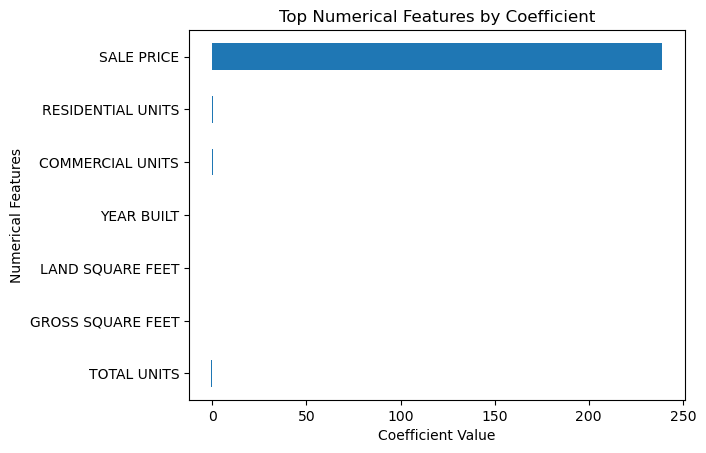

In [22]:
import matplotlib.pyplot as plt

# Plot top numerical features
plt.figure(figsize=(8, 6))
numerical_importance.head(10).plot.barh(x='Feature', y='Coefficient', legend=False)
plt.title('Top Numerical Features by Coefficient')
plt.xlabel('Coefficient Value')
plt.ylabel('Numerical Features')
plt.gca().invert_yaxis()
plt.show()


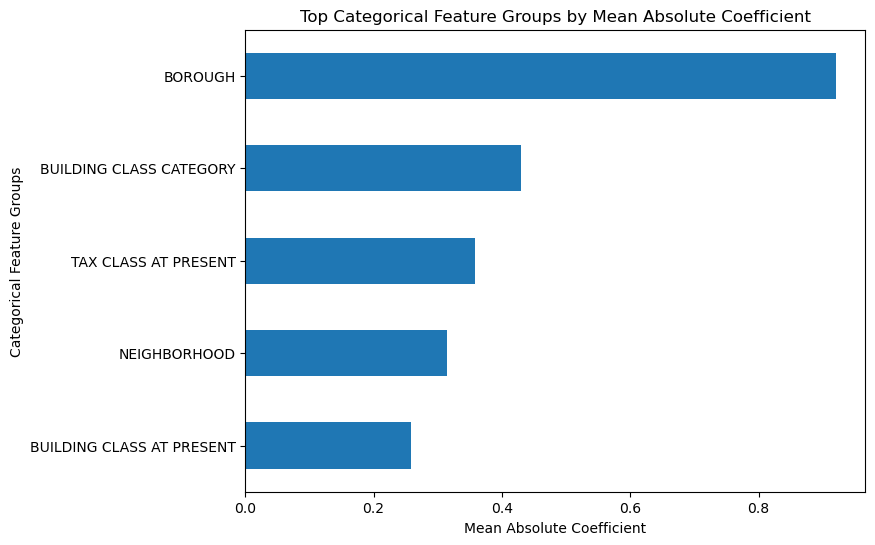

In [23]:
# Plot top categorical feature groups
plt.figure(figsize=(8, 6))
grouped_importance.head(10).plot.barh()
plt.title('Top Categorical Feature Groups by Mean Absolute Coefficient')
plt.xlabel('Mean Absolute Coefficient')
plt.ylabel('Categorical Feature Groups')
plt.gca().invert_yaxis()
plt.show()


In [17]:
# Group data by BOROUGH and NEIGHBORHOOD
borough_neighborhood_stats = data.groupby(['BOROUGH', 'NEIGHBORHOOD']).agg({
    'SALE PRICE': ['mean', 'median', 'count'],  # Average, median price, and count
    'DEMAND_LEVEL': ['sum', 'mean']  # Count and proportion of high-demand properties
}).reset_index()

# Rename columns for clarity
borough_neighborhood_stats.columns = [
    'BOROUGH', 'NEIGHBORHOOD', 
    'AVG_SALE_PRICE', 'MEDIAN_SALE_PRICE', 'TOTAL_SALES', 
    'HIGH_DEMAND_COUNT', 'HIGH_DEMAND_RATIO'
]

# Classify neighborhoods as high or low demand based on high-demand ratio
high_demand_threshold = borough_neighborhood_stats['HIGH_DEMAND_RATIO'].quantile(0.75)
borough_neighborhood_stats['DEMAND_CLASS'] = np.where(
    borough_neighborhood_stats['HIGH_DEMAND_RATIO'] >= high_demand_threshold, 'High Demand', 'Low Demand'
)

# View top results
print(borough_neighborhood_stats.sort_values(by='HIGH_DEMAND_RATIO', ascending=False).head(10))


    BOROUGH           NEIGHBORHOOD  AVG_SALE_PRICE  MEDIAN_SALE_PRICE  \
200       3  DOWNTOWN-FULTON FERRY    2.350981e+06          1531187.5   
202       3   DOWNTOWN-FULTON MALL    2.223030e+06          1219864.0   
8         1           CIVIC CENTER    3.543221e+06          2350000.0   
61        1                TRIBECA    3.444813e+06          1727767.0   
57        1                   SOHO    4.825119e+06          2200000.0   
35        1          JAVITS CENTER    1.164957e+07          3803259.5   
18        1               FLATIRON    3.630578e+06          1460000.0   
274       3     WILLIAMSBURG-NORTH    2.672938e+06          1150000.0   
16        1              FINANCIAL    9.839947e+06          1030000.0   
39        1           LITTLE ITALY    3.742266e+06          2062500.0   

     TOTAL_SALES  HIGH_DEMAND_COUNT  HIGH_DEMAND_RATIO DEMAND_CLASS  
200         1760               1397           0.793750  High Demand  
202         2245               1748           0.778619  

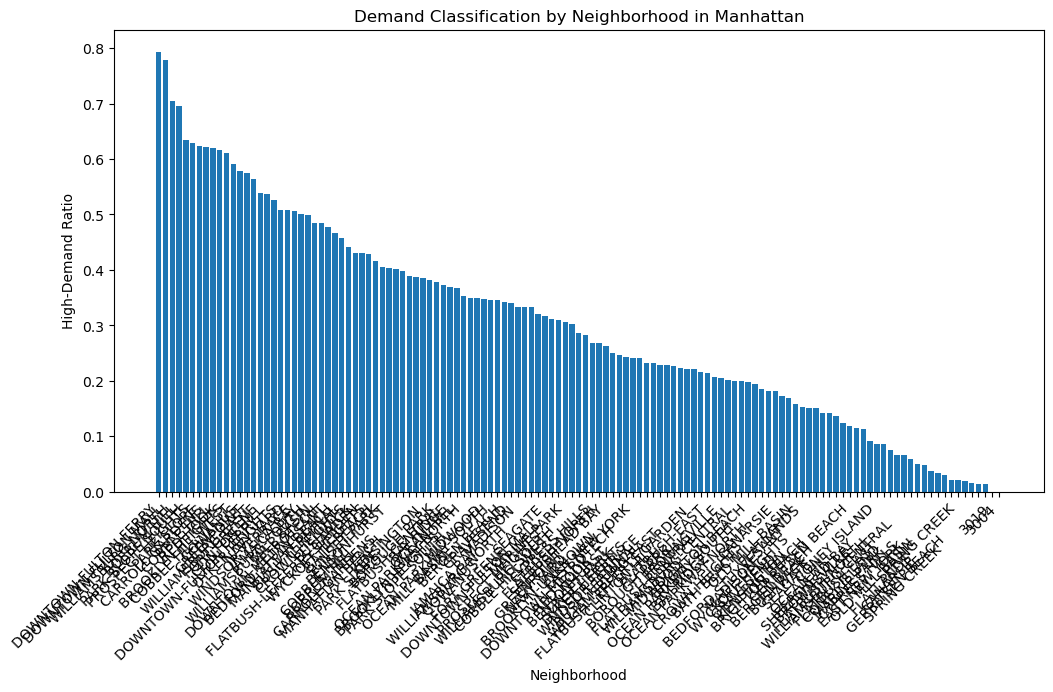

In [18]:
import matplotlib.pyplot as plt

# Filter for a specific borough
borough_stats = borough_neighborhood_stats[borough_neighborhood_stats['BOROUGH'] == '3']

# Plot high-demand ratio by neighborhood
plt.figure(figsize=(12, 6))
borough_stats = borough_stats.sort_values(by='HIGH_DEMAND_RATIO', ascending=False)
plt.bar(borough_stats['NEIGHBORHOOD'], borough_stats['HIGH_DEMAND_RATIO'])
plt.title('Demand Classification by Neighborhood in Manhattan')
plt.xlabel('Neighborhood')
plt.ylabel('High-Demand Ratio')
plt.xticks(rotation=45, ha='right')
plt.show()
